<a href="https://colab.research.google.com/github/kiman-quinn/AI391L-Homework/blob/main/hw1_programming_base_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
from sklearn.metrics import accuracy_score
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [3]:
from sklearn import datasets
import pandas as pd

cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# add target column to df
df['label'] = cancer['target']

# check df
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# probability of malignant cancer (label = 0)

len(df[df['label'] == 0]) / len(df)

0.37258347978910367

In [5]:
# create training set

x = df.drop('label', axis=1)
y = df['label']

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


In [13]:
# experiment with max_depth
accuracy_df = pd.DataFrame()
accuracy_df['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
accuracy_score_list = []
cv_accuracy_list = []

for i in range(1,11):
  # define classifier with new max depth
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=i)

  # cross validation
  score = cross_val_score(estimator=clf, X=x, y=y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE))
  cv_accuracy_list.append(score.mean())

  # fit entire data set
  clf = clf.fit(x,y)

  # predict
  y_pred=clf.predict(x)

  # get accuracy score for entire data set
  accuracy = accuracy_score(y, y_pred)
  accuracy_score_list.append(accuracy)

# add accuracy lists to accuracy df
accuracy_df['accuracy_score'] = accuracy_score_list
accuracy_df['cv_accuracy'] = cv_accuracy_list
accuracy_df

,max_depth,accuracy_score,cv_accuracy
0,1,0.922671,0.894424
1,2,0.942004,0.922556
2,3,0.978910,0.919110
3,4,0.982425,0.920833
4,5,0.994728,0.924373
5,6,0.998243,0.922588
6,7,1.000000,0.924342
7,8,1.000000,0.922588
8,9,1.000000,0.920833
9,10,1.000000,0.920833


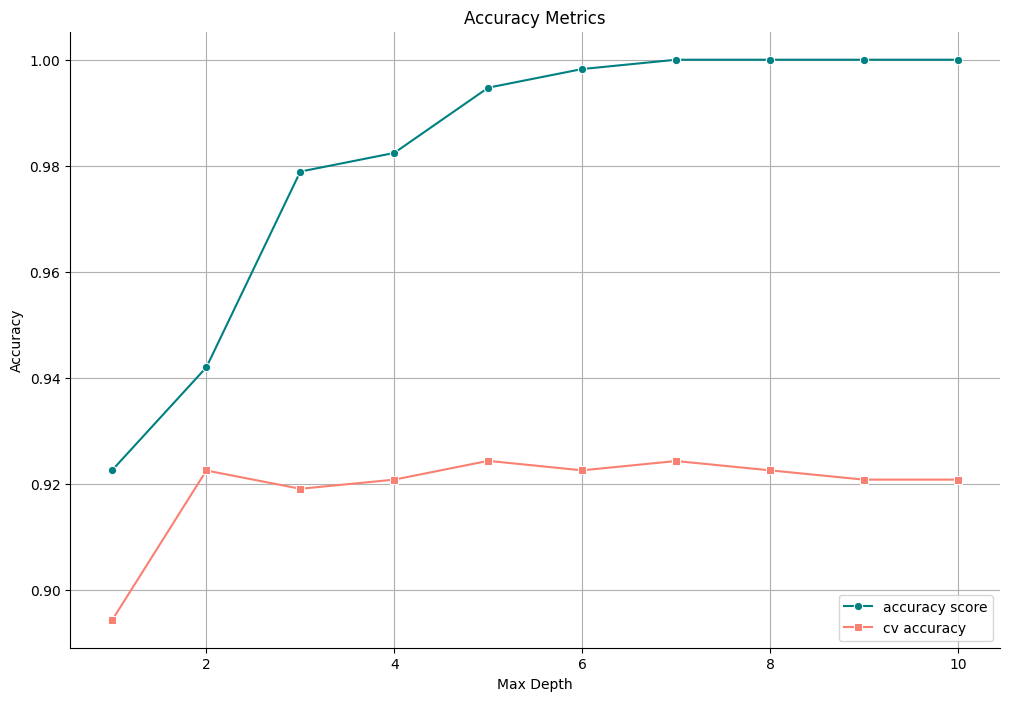

In [14]:
import seaborn as sns

plt.figure(figsize=FIGSIZE)

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='max_depth', y='accuracy_score', data=accuracy_df, marker='o', color='teal', label='accuracy score')
sns.lineplot(x='max_depth', y='cv_accuracy', data=accuracy_df, marker='s', color='salmon', label='cv accuracy')

# Set plot title and axes labels
plt.title('Accuracy Metrics')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**

The best max depth with repect to the full dataset with the highest accuracy are: max_depth = 7 and max_depth = 8 and max_depth = 9 and max_depth = 10.

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**

The best max depth with respect to the cross validated accuracy with the highest accuracy is: max_depth = 5.



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

In [19]:
# experiement with n_estimators
n_est_accur_df = pd.DataFrame()
n_est_accur_df['n_estimators'] = [i for i in range (1,21)]
cv_accuracy_n_est = []


for i in range(1,21):
  # define classifier with new max depth
  rf = ensemble.RandomForestClassifier(random_state=RANDOM_STATE, max_depth=5, n_estimators=i)

  # cross validation
  score = cross_val_score(estimator=rf, X=x, y=y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE))
  cv_accuracy_n_est.append(score.mean())


# add accuracy lists to accuracy df
n_est_accur_df['cv_accuracy'] = cv_accuracy_n_est
n_est_accur_df

,n_estimators,cv_accuracy
0,1,0.917293
1,2,0.929668
2,3,0.945426
3,4,0.948935
4,5,0.945426
5,6,0.950689
6,7,0.947180
7,8,0.941917
8,9,0.948935
9,10,0.945426


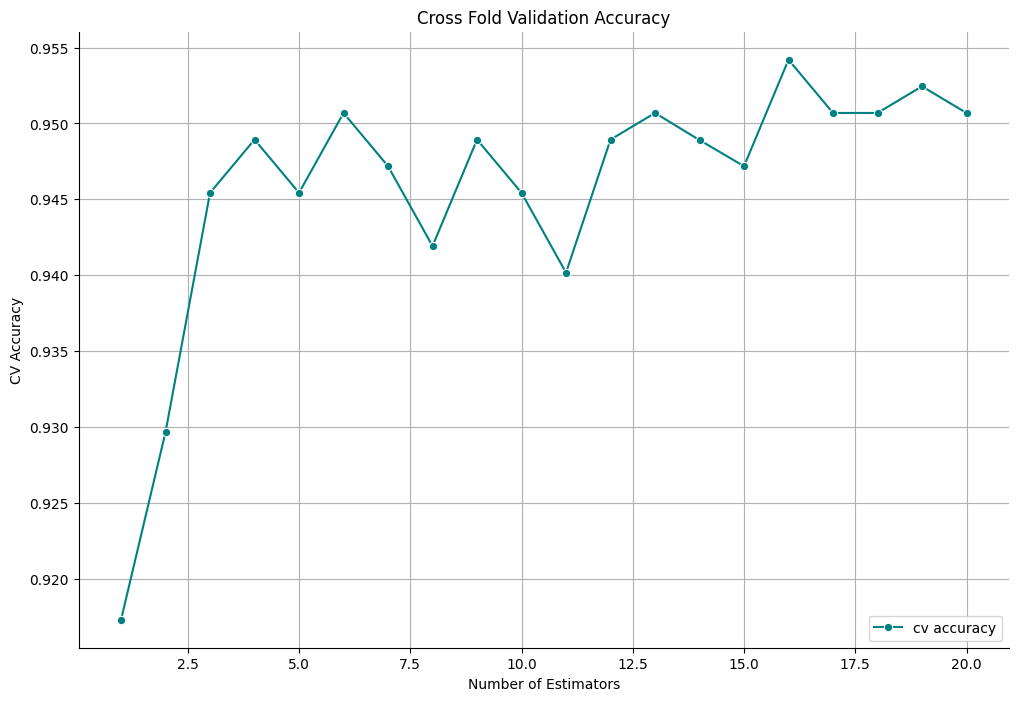

In [20]:
# plot cv accuracy

plt.figure(figsize=FIGSIZE)

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='n_estimators', y='cv_accuracy', data=n_est_accur_df, marker='o', color='teal', label='cv accuracy')

# Set plot title and axes labels
plt.title('Cross Fold Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('CV Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:**

Yes. All of the cross fold validation accuracy measurements are higher than when n_estimators = 1, showing that a random forest is an improvement to a single tree.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:**

The highest accuracy occured with n_estimators = 16, with respect to the cross-validated accuracy.

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

In [21]:
# experiement with max_depth
max_depth_accur_df = pd.DataFrame()
max_depth_accur_df['max_depth'] = [i for i in range(1,11)]
cv_accuracy_max_d = []


for i in range(1,11):
  # define classifier with new max depth
  rf = ensemble.RandomForestClassifier(random_state=RANDOM_STATE, max_depth=i, n_estimators = 16)
  # get cv accuracy score and add to cv accuracy list
  score = cross_val_score(estimator=rf, X=x, y=y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE))
  cv_accuracy_max_d.append(score.mean())

# add accuracy lists to accuracy df
max_depth_accur_df['cv_accuracy'] = cv_accuracy_list
max_depth_accur_df

,max_depth,cv_accuracy
0,1,0.894424
1,2,0.922556
2,3,0.919110
3,4,0.920833
4,5,0.924373
5,6,0.922588
6,7,0.924342
7,8,0.922588
8,9,0.920833
9,10,0.920833


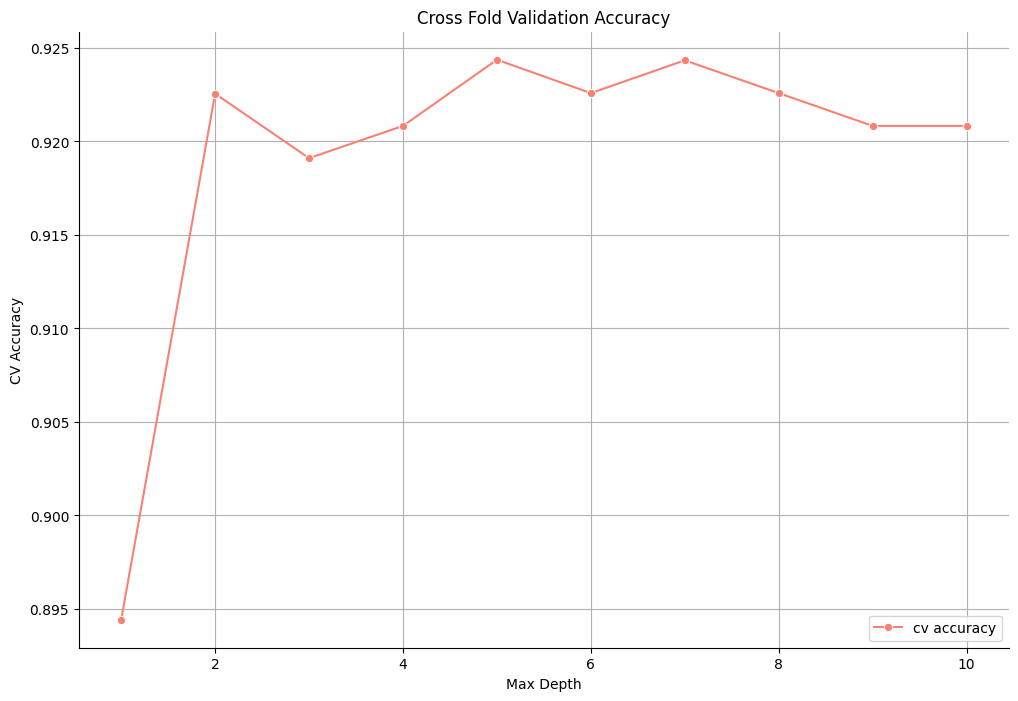

In [22]:
# plot cv accuracy

plt.figure(figsize=FIGSIZE)

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='max_depth', y='cv_accuracy', data=max_depth_accur_df, marker='o', color='salmon', label='cv accuracy')

# Set plot title and axes labels
plt.title('Cross Fold Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:**

The optimal max_depth is the same as in 2(b)ii which is max_depth = 5.

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

1

In [47]:
# define dictionary for random states
max_depth_count = dict()
for i in range(1,11): # range is number of max depths
  max_depth_count[i] = 0
print('max depth count:',max_depth_count)
# loop through random states
for rand_state in range(0,5):
  print('random state', rand_state)
  # define max accuracy
  max_accuracy = 0
  accuracy_list = []
  # loop through max depths
  for i in range(1,11):
    # define classifier with new max depth
    clf = tree.DecisionTreeClassifier(random_state=rand_state, max_depth=i)
    # cross validation
    score = cross_val_score(estimator=clf, X=x, y=y, cv=KFold(n_splits=10, shuffle=True, random_state=rand_state))
    accuracy_list.append(score.mean())
    # reset max accuracy
    if score.mean() >= max_accuracy:
      max_accuracy = score.mean()

  # record max depth for that random state
  max_depths = []
  for i in range(len(accuracy_list)):
    if accuracy_list[i] == max_accuracy:
      max_depths.append(i+1)

  # add max depths to dictionary
  for depth in max_depths:
      max_depth_count[depth] += 1

  print('accuracy list:', accuracy_list)
  print('max accuracy:', max_accuracy)
  print('max depth dictionary:', max_depth_count)




max depth count: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
random state 0
accuracy list: [0.8945175438596491, 0.9279448621553884, 0.9279448621553886, 0.9332706766917293, 0.9315162907268171, 0.9332706766917293, 0.9350563909774436, 0.9279761904761905, 0.9192042606516291, 0.9192042606516291]
max accuracy: 0.9350563909774436
max depth dictionary: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0}
random state 1
accuracy list: [0.8857142857142856, 0.9226503759398497, 0.9208333333333332, 0.9401942355889725, 0.9314223057644112, 0.9349310776942357, 0.9401942355889725, 0.938408521303258, 0.938408521303258, 0.938408521303258]
max accuracy: 0.9401942355889725
max depth dictionary: {1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0, 10: 0}
random state 2
accuracy list: [0.8945488721804511, 0.9139724310776941, 0.931484962406015, 0.9226817042606517, 0.9261904761904761, 0.9367481203007518, 0.9279448621553884, 0.9244674185463658, 0.9244674185463658, 0.9244674185463658

In [66]:
# ** takes a couple minutes to run because of for loops. TO DO: make more efficient **

# define dataframe for random states
max_depth_count = pd.DataFrame()
max_depth_count['max_depth'] = [i for i in range(1,11)] # range is max depths
count_list = [0 for i in range(0,10)]

# loop through random states
for rand_state in range(0,99):
  # print('random state', rand_state)
  # define max accuracy
  max_accuracy = 0
  accuracy_list = []
  # loop through max depths
  for i in range(1,11):
    # define classifier with new max depth
    clf = tree.DecisionTreeClassifier(random_state=rand_state, max_depth=i)
    # cross validation
    score = cross_val_score(estimator=clf, X=x, y=y, cv=KFold(n_splits=10, shuffle=True, random_state=rand_state))
    accuracy_list.append(score.mean())
    # reset max accuracy
    if score.mean() >= max_accuracy:
      max_accuracy = score.mean()

  # record max depth for that random state
  max_depths = []
  for i in range(len(accuracy_list)):
    if accuracy_list[i] == max_accuracy:
      max_depths.append(i+1)

  # add max depth count to list
  for depth in max_depths:
    current_count = count_list[depth-1]
    count_list[depth-1] = current_count+1

# add count list to dataframe
max_depth_count['counts'] = count_list



In [67]:
max_depth_count

,max_depth,counts
0,1,0
1,2,4
2,3,5
3,4,30
4,5,37
5,6,26
6,7,10
7,8,3
8,9,2
9,10,2


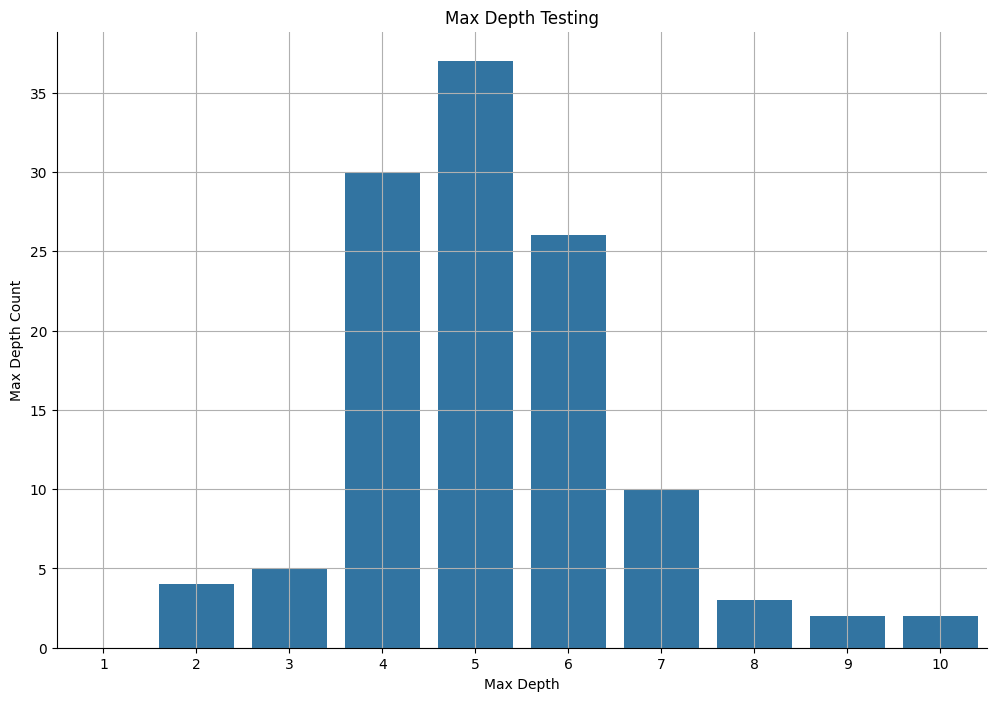

In [68]:
# plot bar plot of max depth counts
plt.figure(figsize=FIGSIZE)

# Create a Seaborn line plot with different markers for each product
sns.barplot(max_depth_count, x="max_depth", y="counts")

# Set plot title and axes labels
plt.title('Max Depth Testing')
plt.xlabel('Max Depth')
plt.ylabel('Max Depth Count')

# Add a grid
plt.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:**

The two most common max depth settings are: max_depth = 4 and max_depth = 5.